In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# read the data
data = pd.read_csv("C:\\Users\\91897\\Downloads\\StudentsPerformance.csv")
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
data.shape

(1000, 8)

<Axes: xlabel='gender', ylabel='count'>

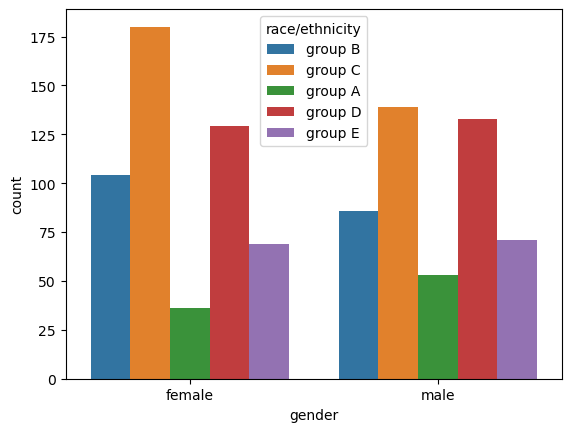

In [5]:
sns.countplot(x='gender',data=data, hue='race/ethnicity')

In [6]:
data['parental level of education'].value_counts()

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

<Axes: xlabel='parental level of education', ylabel='count'>

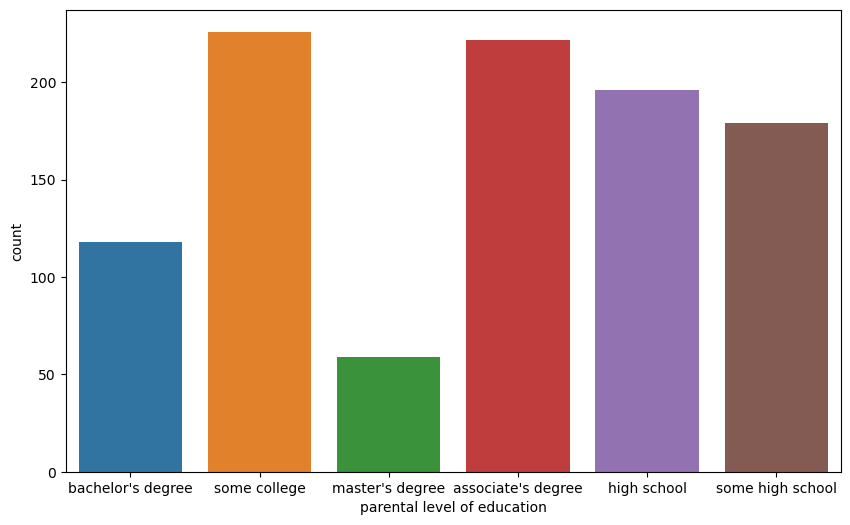

In [7]:
plt.figure(figsize=(10,6))
sns.countplot(x='parental level of education',data=data)

In [8]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [10]:
data['total score'] = data['math score'] + data['reading score'] + data['writing score']
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


<Axes: xlabel='total score', ylabel='Density'>

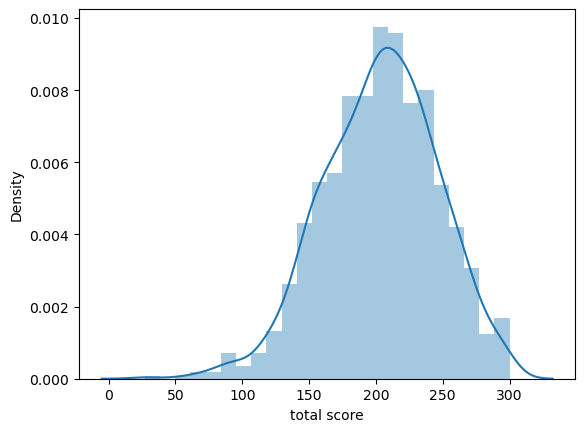

In [11]:
sns.distplot(data['total score'])

<Axes: xlabel='lunch', ylabel='count'>

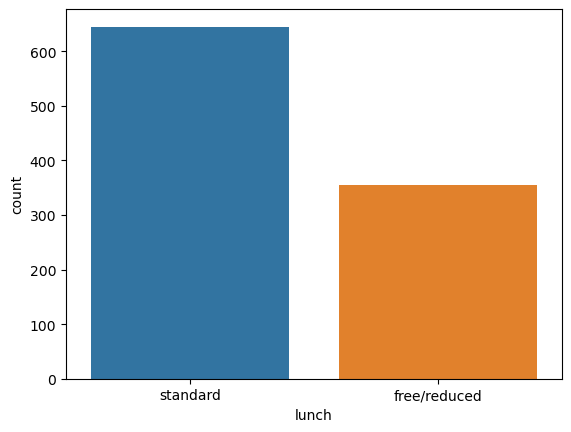

In [12]:
sns.countplot(x='lunch', data=data)

In [13]:
# label encoding 
data.replace({'gender':{'male':0,'female':1},
             'race/ethnicity':{'group A':1,'group B':2,'group C':3,'group D':4,'group E':5},
             'parental level of education':{'master\'s degree':1, 'bachelor\'s degree':2, 'associate\'s degree':3, 'some college':4, 'high school':5, 'some high school':6},
             'lunch':{'standard':0, 'free/reduced':1},
             'test preparation course':{'none':0,'completed':1}},inplace = True)

In [14]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
0,1,2,2,0,0,72,72,74,218
1,1,3,4,0,1,69,90,88,247
2,1,2,1,0,0,90,95,93,278
3,0,1,3,1,0,47,57,44,148
4,0,3,4,0,0,76,78,75,229


In [15]:
X = data.drop(columns=['math score', 'reading score', 'writing score','total score'])
y = data['total score']

In [16]:
X.shape, y.shape

((1000, 5), (1000,))

In [17]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 5), (200, 5), (800,), (200,))

In [18]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(X_train,y_train)
tree

DecisionTreeRegressor()

In [19]:
# training data accuracy
from sklearn.metrics import mean_absolute_error
pred = tree.predict(X_train)
mean_absolute_error(y_train,pred )

25.939694028194026

In [20]:
# test data accuracy
pred = tree.predict(X_test)
mean_absolute_error(y_test,pred )

34.29857990620491

In [21]:
max_depth = np.arange(1,9)
train_error = []
test_error = []

for i in max_depth:
    tree = DecisionTreeRegressor(max_depth=i)
    tree.fit(X_train, y_train)
    
    # training error 
    train_error.append(mean_absolute_error(y_train,tree.predict(X_train)))
    
    #test error
    test_error.append(mean_absolute_error(y_test, tree.predict(X_test)))

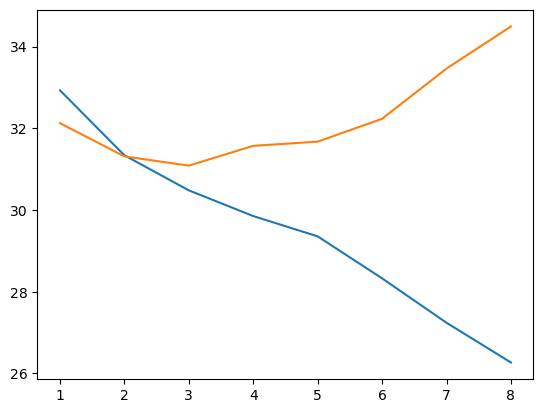

In [22]:
plt.plot(max_depth,train_error)
plt.plot(max_depth, test_error)

In [23]:
min_samples_split = [2,5,10,20,50,100]
train_error = []
test_error = []

for i in min_samples_split:
    tree = DecisionTreeRegressor(min_samples_split=i)
    tree.fit(X_train, y_train)
    
    # training error 
    train_error.append(mean_absolute_error(y_train,tree.predict(X_train)))
    
    #test error
    test_error.append(mean_absolute_error(y_test, tree.predict(X_test)))

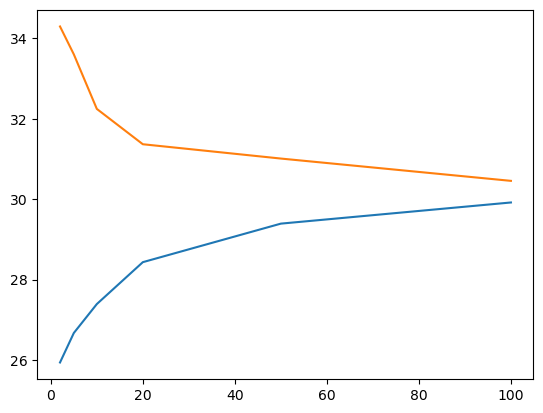

In [24]:
plt.plot(min_samples_split, train_error)
plt.plot(min_samples_split, test_error)

In [25]:
final_tree = DecisionTreeRegressor(max_depth=3, min_samples_split=100)
final_tree.fit(X_train, y_train)
pred = final_tree.predict(X_test)
mean_absolute_error(y_test, pred)

31.08610237047518

In [26]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(X_train, y_train)
forest

RandomForestRegressor()

In [27]:
mean_absolute_error(y_train, forest.predict(X_train))

26.573343010879462

In [28]:
mean_absolute_error(y_test, forest.predict(X_test))

33.14169306905955

In [29]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700] 
max_depth_list = [1,2, 3, 4, 8, 16, 32, 64, None]

In [30]:
train_error = []
test_error = []
for i in max_depth_list:
    forest = RandomForestRegressor(max_depth=i)
    forest.fit(X_train, y_train)
    
    train_error.append(mean_absolute_error(y_train,forest.predict(X_train)))
    
    test_error.append(mean_absolute_error(y_test,forest.predict(X_test)))

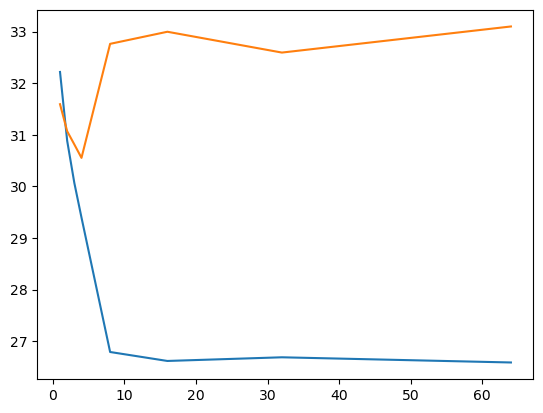

In [31]:
plt.plot(max_depth_list, train_error)
plt.plot(max_depth_list, test_error)
plt.show()

In [32]:
np.argmin(test_error)

3

In [33]:
test_error

[31.59238649795009,
 31.068841388656537,
 30.813140977812672,
 30.553037366136504,
 32.76169368499467,
 32.99605387430767,
 32.592763730147375,
 33.09823430481075,
 33.24602803482558]

In [34]:
train_error = []
test_error = []
for i in min_samples_split_list:
    forest = RandomForestRegressor(min_samples_split=i)
    forest.fit(X_train, y_train)
    
    train_error.append(mean_absolute_error(y_train,forest.predict(X_train)))
    
    test_error.append(mean_absolute_error(y_test,forest.predict(X_test)))    
    

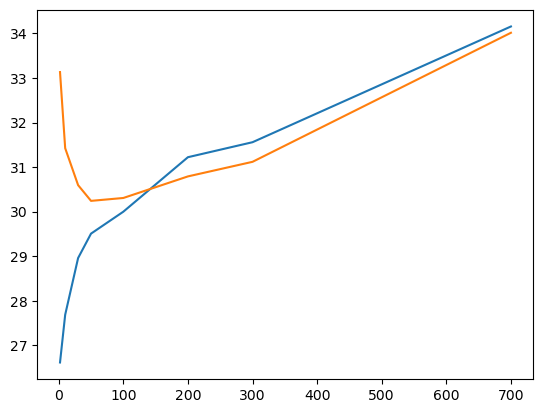

In [35]:
plt.plot(min_samples_split_list, train_error)
plt.plot(min_samples_split_list, test_error)
plt.show()

In [36]:
np.argmin(test_error)

3

In [37]:
n_estimators_list = [10,50,100,500]

train_error = []
test_error = []
for i in n_estimators_list:
    forest = RandomForestRegressor(min_samples_split=i)
    forest.fit(X_train, y_train)
    
    train_error.append(mean_absolute_error(y_train,forest.predict(X_train)))
    
    test_error.append(mean_absolute_error(y_test,forest.predict(X_test)))

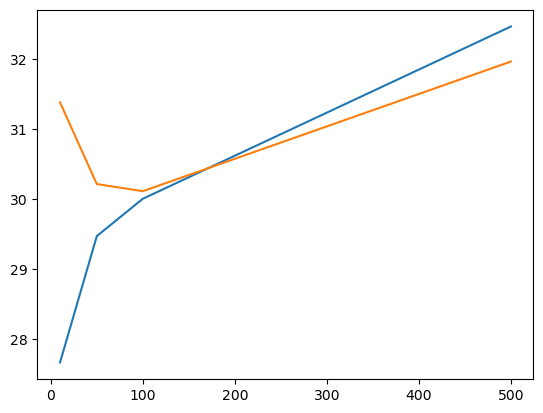

In [38]:
plt.plot(n_estimators_list, train_error)
plt.plot(n_estimators_list, test_error)
plt.show()

In [39]:
np.argmin(test_error)

2

In [40]:
forest = RandomForestRegressor(max_depth=4, min_samples_split=100, n_estimators=50)
forest.fit(X_train, y_train)

mean_absolute_error(y_test,forest.predict(X_test))

30.25520429978906

In [41]:
n = int(len(X_train)*0.8)

In [42]:
X_train_fit, X_train_eval, y_train_fit, y_train_eval = X_train[:n],X_train[n:], y_train[:n], y_train[n:]

In [43]:
from xgboost import XGBRegressor
XBG = XGBRegressor(n_estimators = 200, learning_rate=0.1)
XBG.fit(X_train_fit, y_train_fit, eval_set=[(X_train_eval, y_train_eval)],early_stopping_rounds=10)
mean_absolute_error(y_test, XBG.predict(X_test))

[0]	validation_0-rmse:43.09223
[1]	validation_0-rmse:42.29618
[2]	validation_0-rmse:41.68539
[3]	validation_0-rmse:41.13893
[4]	validation_0-rmse:40.76126
[5]	validation_0-rmse:40.43443
[6]	validation_0-rmse:40.21659
[7]	validation_0-rmse:39.98832
[8]	validation_0-rmse:39.83506
[9]	validation_0-rmse:39.77277
[10]	validation_0-rmse:39.70646
[11]	validation_0-rmse:39.64943
[12]	validation_0-rmse:39.59918
[13]	validation_0-rmse:39.59274
[14]	validation_0-rmse:39.55487
[15]	validation_0-rmse:39.55528
[16]	validation_0-rmse:39.53014
[17]	validation_0-rmse:39.54344
[18]	validation_0-rmse:39.57892
[19]	validation_0-rmse:39.58408
[20]	validation_0-rmse:39.59507
[21]	validation_0-rmse:39.61029
[22]	validation_0-rmse:39.61421
[23]	validation_0-rmse:39.64386
[24]	validation_0-rmse:39.65404
[25]	validation_0-rmse:39.71409


31.23441925048828

# **using CrossVal , GridSearch and RandomizedSearch**

In [44]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRFRegressor

In [45]:
models = [DecisionTreeRegressor(), RandomForestRegressor(), XGBRegressor()]

In [50]:
# trying cross validation for single model
reg = cross_val_score(DecisionTreeRegressor(), X_train, y_train, cv=5)
np.abs(np.mean(reg))*100

12.116048329521925

In [51]:
# trying for all models
for model in models:
    reg = cross_val_score(model, X_train, y_train, cv = 5)
    print(model," scores are ", reg)
    print('avg score is ',np.abs(np.mean(reg))*100)

DecisionTreeRegressor()  scores are  [-0.22401045 -0.1744904  -0.04574921 -0.19153867  0.02998631]
avg score is  12.116048329521925
RandomForestRegressor()  scores are  [-0.09614887 -0.08400574  0.07763915 -0.08332543  0.10215638]
avg score is  1.6736900802114474
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=

In [52]:
# got the model 
model = RandomForestRegressor()

In [53]:
# now let's find best parameters
# params by **chat gpt**
"""
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}
"""
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

In [55]:
Regressor = GridSearchCV(RandomForestRegressor(),param_grid,cv=5)
Regressor.fit(X_train, y_train)
Regressor.cv_results_

{'mean_fit_time': array([0.12301922, 0.22949615, 0.41044254, 0.1157218 , 0.21887131,
        0.31685963, 0.08031373, 0.18824582, 0.26891146, 0.1004025 ,
        0.21616516, 0.29716678, 0.08822656, 0.20329061, 0.2749752 ,
        0.09360166, 0.15541711, 0.25291104, 0.09865203, 0.18943272,
        0.23407764, 0.08896971, 0.16255379, 0.26345577, 0.07663107,
        0.15699191, 0.24618354, 0.10049539, 0.21470857, 0.3136436 ,
        0.09666777, 0.17249422, 0.29013829, 0.08346252, 0.16143112,
        0.2457798 , 0.10877891, 0.23653774, 0.31669917, 0.10882235,
        0.24115763, 0.34543796, 0.11561341, 0.20530524, 0.38555412,
        0.1333806 , 0.21324368, 0.32916732, 0.12745504, 0.19122343,
        0.29589477, 0.09638858, 0.20134993, 0.30782843, 0.14079428,
        0.23177061, 0.40401363, 0.12521853, 0.24929714, 0.31342254,
        0.10999627, 0.21942649, 0.31080027, 0.12112436, 0.24379396,
        0.35368695, 0.11171317, 0.23214965, 0.32587051, 0.10778427,
        0.19881964, 0.30102777,

In [56]:
Regressor.best_params_

{'max_depth': None,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 100}

In [57]:
Regressor.best_estimator_

RandomForestRegressor(min_samples_leaf=4, min_samples_split=10)

In [61]:
model = Regressor.best_estimator_
mean_absolute_error(y_test,model.predict(X_test))

30.93507767158726